# Sensitivity analysis
## Upper Olivares catchment - january, 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/Olivares

#### import packages

In [20]:
import subprocess
import os
import time
import numpy as np
import pandas as pd
import openpyxl
import datetime
import hydroeval as he
from configparser import ConfigParser
from datetime import datetime
import matplotlib.pyplot as plt

## 1.- Define the functions

In [ ]:
#Start time
start_time = datetime.now()
#Define some functions
def run_sphy():
    os.system("python -m SPHY.main -i C:\olivares\sphy_config_olivares_s.cfg")
    
def performance(kge_r,corr,gamma,betha,nash_r):
    #Import paths
    obs_path = r"P:\Projects\Olivares\Streamflow\qobs_2000.csv"
    sim_path = r"C:\Users\pauls\Anaconda3\pkgs\sphy-2.2.1-py_0\site-packages\SPHY\Olivares\output\QTOTSubBasinTSS.tss"
    
    #Read and prepare obs streamflow
    obs = pd.read_csv(obs_path)
    obs = obs.iloc[:,1]

    #Read and prepare sim streamflow
    sim_read = pd.read_csv(sim_path,index_col=False,skiprows=4)
    sim = []
    
    for v in range(len(sim_read)):
        val = sim_read.iloc[v,0].strip()
        val = " ".join(val.split())
        sim.append(val)

    sim = pd.DataFrame(sim)
    sim.columns = ["name"]
    sim = sim["name"].str.split(" ",expand=True)
    sim = pd.DataFrame(sim.iloc[:,2]).astype(float)
    sim = sim.iloc[:,0]

    #Calculate KGE'
    kge = pd.DataFrame(he.evaluator(he.kgeprime, sim, obs),index=["KGE","r","γ","β"])
    nash = pd.DataFrame(he.evaluator(he.nse, sim, obs),index=["NASH"])
    kge_r.append(kge[0][0])
    corr.append(kge[0][1])
    gamma.append(kge[0][2])
    betha.append(kge[0][3])
    nash_r.append(nash_r[0][0])
    print(kge)
    print(nash)
    
def soilpars(param,value):
    #Read config_file
    config_path = r"C:\olivares\sphy_config_olivares_s.cfg"
    config_oliv = ConfigParser()
    config_oliv.read(config_path)
    print(param)
    #1st step 0.5*param
    config_oliv["SOILPARS"][str(param)] = str(value*0.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)
    #2nd step 1.5*param
    config_oliv["SOILPARS"][str(param)] = str(value*1.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)        
    #3rd original value
    config_oliv["SOILPARS"][str(param)] = str(value)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)

def groundwpars(param,value):
    #Read config_file
    config_path = r"C:\olivares\sphy_config_olivares_s.cfg"
    config_oliv = ConfigParser()
    config_oliv.read(config_path)
    print(param)
    #1st step 0.5*param
    config_oliv["GROUNDW_PARS"][str(param)] = str(value*0.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)
    #2nd step 1.5*param
    config_oliv["GROUNDW_PARS"][str(param)] = str(value*1.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)        
    #3rd original value
    config_oliv["GROUNDW_PARS"][str(param)] = str(value)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
        
def glacier(param,value):
    #Read config_file
    config_path = r"C:\olivares\sphy_config_olivares_s.cfg"
    config_oliv = ConfigParser()
    config_oliv.read(config_path)
    print(param)
    #1st step 0.5*param
    config_oliv["GLACIER"][str(param)] = str(value*0.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)
    #2nd step 1.5*param
    config_oliv["GLACIER"][str(param)] = str(value*1.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)        
    #3rd original value
    config_oliv["GLACIER"][str(param)] = str(value)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)

def snow(param,value):
    #Read config_file
    config_path = r"C:\olivares\sphy_config_olivares_s.cfg"
    config_oliv = ConfigParser()
    config_oliv.read(config_path)
    print(param)
    #1st step 0.5*param
    config_oliv["SNOW"][str(param)] = str(value*0.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)
    #2nd step 1.5*param
    config_oliv["SNOW"][str(param)] = str(value*1.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)        
    #3rd original value
    config_oliv["SNOW"][str(param)] = str(value)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
        
def routing(param,value):
    #Read config_file
    config_path = r"C:\olivares\sphy_config_olivares_s.cfg"
    config_oliv = ConfigParser()
    config_oliv.read(config_path)
    print(param)
    #1st step 0.5*param
    config_oliv["ROUTING"][str(param)] = str(value*0.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)
    #2nd step 1.5*param
    config_oliv["ROUTING"][str(param)] = str(value*1.5)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)
    run_sphy()
    performance(kling_gupta,coef_corr,variability,bias,nash_sutt)        
    #3rd original value
    config_oliv["ROUTING"][str(param)] = str(value)
    with open(config_path, 'w') as conf: #Save the config file with the params edited
        config_oliv.write(conf)

## 2.- Analysis

In [ ]:
kling_gupta = []
coef_corr = []
variability = []
bias = []
nash_sutt = []

#Base run
run_sphy()
performance(kling_gupta,coef_corr,variability,bias,nash_sutt)

#Vector with original values
param_values = [850,
               1200,
               5,
               3000,
               2000,
               3,
               0.5,
               0.5,
               0.05,
               21.14,
               5.8,
               0.5,
               12,
               0.5,
               12,
               0.5]
param_names = ["RootDepthFlat",
              "SubDepthFlat",
              "CapRiseMax",
              "GwDepth",
              "GwSat",
              "deltaGw",
              "BaseThresh",
              "alphaGw",
              "YieldGw",
              "DDFG",
              "DDFDG",
              "GlacF",
              "Tcrit",
              "SnowSC",
              "DDFS",
              "kx"]

for p in range(len(param_names)):
    if p == 0 or p == 1 or p == 2:
        soilpars(param_names[p],param_values[p])
    if p == 3 or p == 4 or p == 5 or p == 6 or p == 7 or p == 8:
        groundwpars(param_names[p],param_values[p])
    if p == 9 or p == 10 or p == 11:
        glacier(param_names[p],param_values[p])
    if p == 12 or p == 13 or p == 14:
        snow(param_names[p],param_values[p])
    if p == 15:
        routing(param_names[p],param_values[p])

#Array to DataFrame
kling_gupta = pd.DataFrame(kling_gupta)
coef_corr = pd.DataFrame(coef_corr)
variability = pd.DataFrame(variability)
bias = pd.DataFrame(bias)
nash_sutt = pd.DataFrame(nash_sutt)

#DataFrame to excel
kling_gupta.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\kge.xlsx", index = False)
coef_corr.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\correlation.xlsx", index = False)
variability.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\variability.xlsx", index = False)
bias.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\bias.xlsx", index = False)
nash_sutt.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\nash.xlsx", index = False)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

## 3.- Plotting results

In [69]:
# Reading kge & nash
kge = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\kge.xlsx")
kge.columns = ["KGE"]
corr = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\correlation.xlsx")
corr.columns = ["Correlation"]
var = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\variability.xlsx")
var.columns = ["Coefficient of variation"]
bias = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\bias.xlsx")
bias.columns = ["Bias"]
#nash = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\nash.xlsx")
#nash.columns = ["Nash"]

In [107]:
index = [] 
param_names = ["RootDepthFlat","SubDepthFlat","CapRiseMax","GwDepth","GwSat","deltaGw","BaseThresh",
               "alphaGw","YieldGw","DDFG","DDFDG","GlacF","Tcrit","SnowSC","DDFS","kx"]
for i in param_names:
    if i == param_names[0]:
        index.append("base")
    index.append("0.5_"+i)
    index.append("1.5_"+i)
    
index

kge.index = index
corr.index = index
var.index = index
bias.index = index
#nash.index = nash

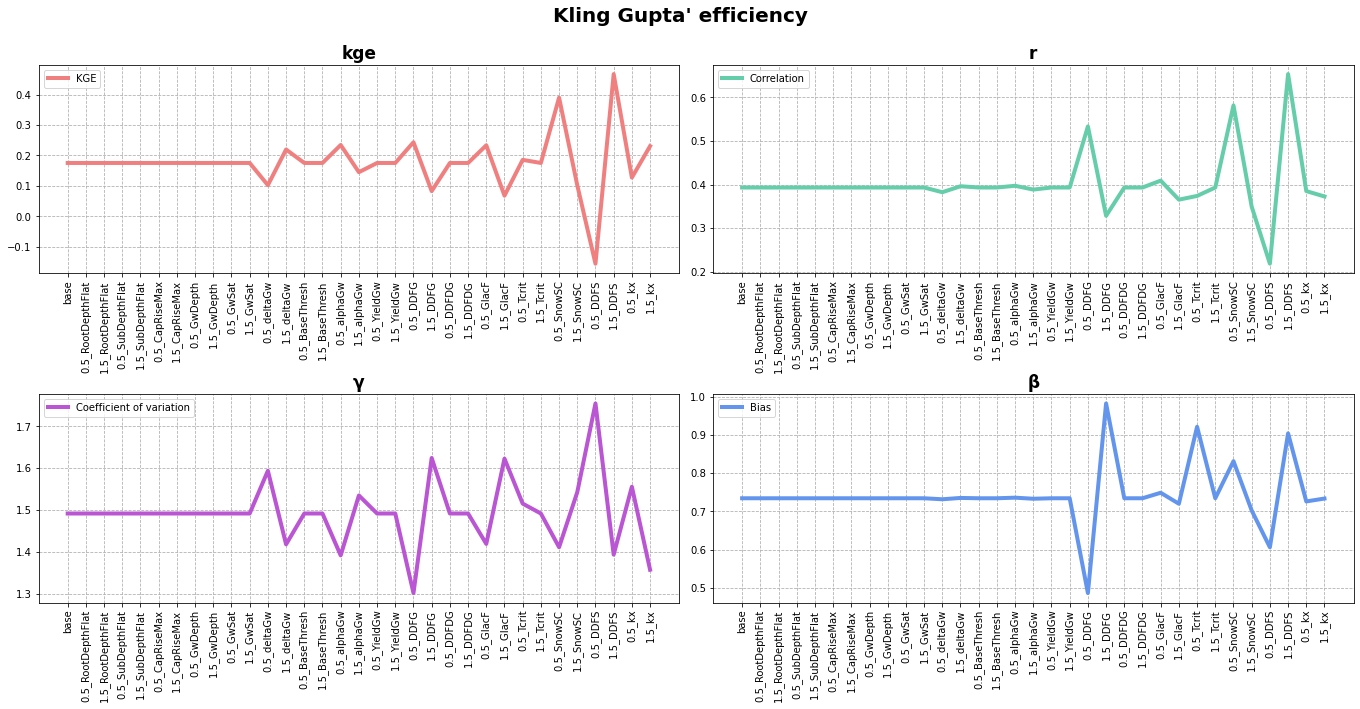

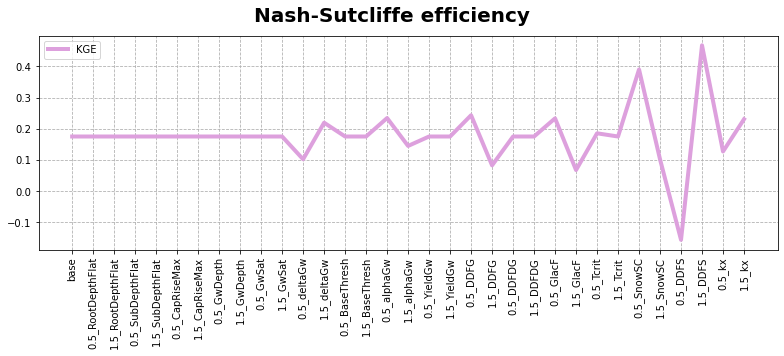

In [178]:
#KGE
#Define subplots dimensions
fig = plt.figure(figsize=(19,10))

#Specific settings
ax0 = fig.add_subplot(221)
kge.plot(ax=ax0, color="lightcoral", linewidth=4)
plt.grid(ls="--")
ax0.set_xticks(np.arange(len(kge)))
ax0.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=True)
plt.title("kge",fontweight="bold",fontsize=17)

ax1 = fig.add_subplot(222)
corr.plot(ax=ax1, color="mediumaquamarine", linewidth=4)
plt.grid(ls="--")
ax1.set_xticks(np.arange(len(kge)))
ax1.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=True)
plt.title("r",fontweight="bold",fontsize=17)

ax2 = fig.add_subplot(223)
var.plot(ax=ax2, color="mediumorchid", linewidth=4)
plt.grid(ls="--")
ax2.set_xticks(np.arange(len(kge)))
ax2.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=True)
plt.title("γ",fontweight="bold",fontsize=17)

ax3 = fig.add_subplot(224)
bias.plot(ax=ax3, color="cornflowerblue", linewidth=4)
plt.grid(ls="--")
ax3.set_xticks(np.arange(len(kge)))
ax3.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=True)
plt.title("β",fontweight="bold",fontsize=17)
#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Kling Gupta' efficiency",fontweight="bold",fontsize=20)
plt.show()


#NASH - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig2 = plt.figure(figsize=(11,5))

#Specific settings
ax4 = fig2.add_subplot(111)
kge.plot(ax=ax4, color="plum", linewidth=4)
plt.grid(ls="--")
ax4.set_xticks(np.arange(len(kge)))
ax4.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=True)

#General settings
plt.tight_layout()
fig2.subplots_adjust(top=0.9)
fig2.suptitle("Nash-Sutcliffe efficiency",fontweight="bold",fontsize=20)
plt.show()


In [ ]:
kling_gupta.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\kge.xlsx", index = False)
coef_corr.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\correlation.xlsx", index = False)
variability.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\variability.xlsx", index = False)
bias.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\bias.xlsx", index = False)
nash_sutt.to_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\nash.xlsx", index = False)